Download and unzip the data. Look at a few lines to see what the data really looks like.

In [3]:
!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz
!gunzip amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz
!head -1688 amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv | tail -10 > sample.tsv

--2019-10-29 07:13:24--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.9.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.9.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253570168 (242M) [application/x-gzip]
Saving to: ‘amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz’

amazon_reviews_us_D 100%[===================>] 241.82M  16.9MB/s    in 16s     

2019-10-29 07:13:40 (15.3 MB/s) - ‘amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz’ saved [253570168/253570168]



In [2]:
!cat sample.tsv

US	41407658	R36QGZ2E1B796M	B000V66PDE	31743362	In Da Club (Explicit)	Digital_Music_Purchase	5	0	0	N	Y	Great song	I like it	2015-08-31
US	20257308	R3BKQUMWPSFP0H	B00J569JO8	982266919	Vicious Dominion	Digital_Music_Purchase	5	0	0	N	N	Makes me want to listen to more.	Very good sounding. Powerful choruses, and great melody to go with it.	2015-08-31
US	17929559	RKMVJL6JK5FCB	B00FY4438W	712405658	River Flows In You	Digital_Music_Purchase	5	0	0	N	Y	Five Stars	great music	2015-08-31
US	50513034	R2CEO6LDG5LFOZ	B00DBB9FQA	735987565	Advice from a Bear	Digital_Music_Purchase	5	0	0	N	Y	Five Stars	Great little song, delivered well.	2015-08-31
US	42724323	R1PJXTCI94CAL4	B000S4CM72	45040396	Country Roads [Explicit]	Digital_Music_Purchase	4	0	0	N	Y	great song	needs a little more intro before it starts	2015-08-31
US	26395872	RS731FAE6BOCC	B011DBV7CE	586864540	Kick The Dust Up	Digital_Music_Purchase	4	0	0	N	Y	Four Stars	got this for my kids - they love him	2015-08-31
US	26073809	R3LYXTYF0YSFV	B00Q7PLY1Q	

Load the dataset to pandas and check if it looks okay.

In [2]:
import pandas as pd
import csv

df = pd.read_csv('amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz', sep='\t', engine="python",  quoting=csv.QUOTE_NONE)
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,10293599,R14LVB34Z2Z53I,B000YMOQZY,262935067,Knockin' On Heaven's Door,Digital_Music_Purchase,5,0,0,N,Y,favorites,Great rendition. Great song,2015-08-31
1,US,6087195,R2M0R9CWPC82LT,B00ISAEC80,452318038,Flawless,Digital_Music_Purchase,5,0,0,N,Y,Five Stars,A good music to listen.,2015-08-31
2,US,33717063,RQNQI2R3BM52A,B00VBB6AVU,675969129,Scandal of Grace,Digital_Music_Purchase,4,0,0,N,Y,Good,Not as good as the original but I needed to he...,2015-08-31
3,US,14948020,RTUIX1135HUAB,B008A5POJO,282925893,I Surrender (Live),Digital_Music_Purchase,5,0,0,N,Y,Wonderful lyrics! Makes you feel like praying,Time to worship and surrender with this song. ...,2015-08-31
4,US,21694522,RE3QSAT8TL010,B014CW2RN4,109077793,We Are Young (Jersey Club),Digital_Music_Purchase,4,0,0,N,Y,Hot remix but took short,So this should be longer....but love this song:),2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688879,US,49890809,RPJVPR5A5XRAN,B0026GBMLM,42676959,The Human Condition In Twelve Fractions,Digital_Music_Purchase,5,0,0,N,N,Classic,Sickening album. Just the hardest music ever m...,2001-11-17
1688880,US,49890809,R1497N35CA1J5,B000TETLAW,915283202,Liberate te ex Inferis,Digital_Music_Purchase,5,0,0,N,N,Their best,Zao's best album. When the metal and hardcore ...,2001-07-25
1688881,US,46804575,RA1QA65MLJA0S,B00138GY0I,191442803,Blood On The Dance Floor/ History In The Mix,Digital_Music_Purchase,4,0,0,N,N,4 of 5,This album has two titles because it is essent...,2000-12-07
1688882,US,49890809,R1AUDY2ED3Q1YT,B005NVYISQ,174062955,Satisfaction Is The Death Of Desire,Digital_Music_Purchase,5,0,0,N,N,The original,Straight forward tough hardcore. Stuff to lift...,2000-08-16


# **Conceptualization**

Before we start building any model here is what I think about the problem -

1. It is not clear to what extent review text can predict the rating and total number of helpful votes.
  - ratings are subjective, there is no calibration.
  - some people write very small and generic reviews.
  - number of helpful votes may also depend on when the review was written.
2. Review title might carry more weight than the review body - we may want to experiment with varying this relative weight.
3. Length of review might have some correlation with helpfulness, as descriptive reviews are likely to be more useful.
4. Use of more descriptive adjectives and adverbs are also likely to be more helpful.
5. A person writing one helpful review is likely to write more reviews which are marked helpful.
6. If number of reviews per reviewer is high, one may find some interesting pattern in ratings from the same reviewer as well.
7. It is also possible that some product-category get more reviews, higher ratings, more upvotes etc.


I would do some EDA to validate some of the above hypothesis and find more interesting insights.


# **EDA**

In [3]:
df["review_length"] = df["review_body"].astype(str).map(len)


In [5]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length
0,US,10293599,R14LVB34Z2Z53I,B000YMOQZY,262935067,Knockin' On Heaven's Door,Digital_Music_Purchase,5,0,0,N,Y,favorites,Great rendition. Great song,2015-08-31,29
1,US,6087195,R2M0R9CWPC82LT,B00ISAEC80,452318038,Flawless,Digital_Music_Purchase,5,0,0,N,Y,Five Stars,A good music to listen.,2015-08-31,23
2,US,33717063,RQNQI2R3BM52A,B00VBB6AVU,675969129,Scandal of Grace,Digital_Music_Purchase,4,0,0,N,Y,Good,Not as good as the original but I needed to he...,2015-08-31,103
3,US,14948020,RTUIX1135HUAB,B008A5POJO,282925893,I Surrender (Live),Digital_Music_Purchase,5,0,0,N,Y,Wonderful lyrics! Makes you feel like praying,Time to worship and surrender with this song. ...,2015-08-31,93
4,US,21694522,RE3QSAT8TL010,B014CW2RN4,109077793,We Are Young (Jersey Club),Digital_Music_Purchase,4,0,0,N,Y,Hot remix but took short,So this should be longer....but love this song:),2015-08-31,48


In [6]:
df.corr()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length
customer_id,1.000000,-0.000118,-0.029800,0.041791,0.043246,0.080727
product_parent,-0.000118,1.000000,0.001979,-0.003460,-0.003436,-0.000567
star_rating,-0.029800,0.001979,1.000000,-0.074012,-0.174298,-0.052895
helpful_votes,0.041791,-0.003460,-0.074012,1.000000,0.892437,0.223474
total_votes,0.043246,-0.003436,-0.174298,0.892437,1.000000,0.206401
review_length,0.080727,-0.000567,-0.052895,0.223474,0.206401,1.000000


There is very small correlation between review_length and helpfulness. Only total_votes and helpful_votes are highly correlated, but that does not mean much. That makes me wonder if I should check the ratio of helpful votes.

In [8]:
df['helpfulness'] = df['helpful_votes'] / (1 + df['total_votes'])  # Adding 1 to avoid division by zero
df.corr()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,helpfulness
customer_id,1.000000,-0.000118,-0.029800,0.041791,0.043246,0.080727,0.076452
product_parent,-0.000118,1.000000,0.001979,-0.003460,-0.003436,-0.000567,-0.005033
star_rating,-0.029800,0.001979,1.000000,-0.074012,-0.174298,-0.052895,-0.055327
helpful_votes,0.041791,-0.003460,-0.074012,1.000000,0.892437,0.223474,0.436079
total_votes,0.043246,-0.003436,-0.174298,0.892437,1.000000,0.206401,0.376120
review_length,0.080727,-0.000567,-0.052895,0.223474,0.206401,1.000000,0.261294
helpfulness,0.076452,-0.005033,-0.055327,0.436079,0.376120,0.261294,1.000000


In [0]:
df[df['star_rating'] == 5].corr()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,helpfulness
customer_id,1.000000,-0.001004,NaN,0.036349,0.037047,0.075019,0.069740
product_parent,-0.001004,1.000000,NaN,-0.002288,-0.002524,-0.000867,-0.004458
star_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful_votes,0.036349,-0.002288,NaN,1.000000,0.981782,0.231814,0.430627
total_votes,0.037047,-0.002524,NaN,0.981782,1.000000,0.230187,0.419581
review_length,0.075019,-0.000867,NaN,0.231814,0.230187,1.000000,0.263974
helpfulness,0.069740,-0.004458,NaN,0.430627,0.419581,0.263974,1.000000


In [0]:
df[df['star_rating'] == 1].corr()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,helpfulness
customer_id,1.000000,0.011110,NaN,0.054236,0.057771,0.068433,0.093470
product_parent,0.011110,1.000000,NaN,-0.024727,-0.010910,0.004603,-0.022046
star_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful_votes,0.054236,-0.024727,NaN,1.000000,0.685565,0.209079,0.513972
total_votes,0.057771,-0.010910,NaN,0.685565,1.000000,0.195779,0.262372
review_length,0.068433,0.004603,NaN,0.209079,0.195779,1.000000,0.210809
helpfulness,0.093470,-0.022046,NaN,0.513972,0.262372,0.210809,1.000000


In [0]:
df[df['star_rating'] == 3].corr()

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,helpfulness
customer_id,1.000000,0.004039,NaN,0.058127,0.067825,0.102535,0.104187
product_parent,0.004039,1.000000,NaN,-0.004625,-0.007419,-0.007528,-0.008528
star_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpful_votes,0.058127,-0.004625,NaN,1.000000,0.923683,0.221298,0.456130
total_votes,0.067825,-0.007419,NaN,0.923683,1.000000,0.227687,0.420123
review_length,0.102535,-0.007528,NaN,0.221298,0.227687,1.000000,0.269128
helpfulness,0.104187,-0.008528,NaN,0.456130,0.420123,0.269128,1.000000


I do a density plot of helpfulness to see how much helpful a review is considered on an average.

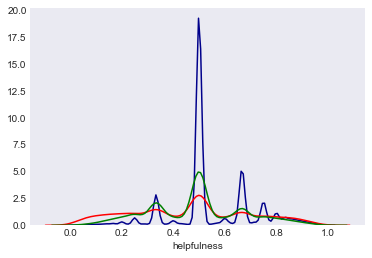

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

hdf = df[df['helpfulness'] > 0]
plt.style.use('seaborn-dark')

sns.distplot(hdf['helpfulness'], hist=False, kde=True, color = 'darkblue')
sns.distplot(hdf[hdf['star_rating'] == 1]['helpfulness'], hist=False, kde=True, color = 'red')
sns.distplot(hdf[hdf['star_rating'] == 3]['helpfulness'], hist=False, kde=True, color = 'green') # looks like most ratings are 5 star


It seems like most reviews are considered helpful only by 50% of people voting. This is specially true for higher rated reviews. **Since there is no universal agreement on helpfulness, we may not get a very good predictor.**

Next I consider the time factor. I want to see if helpfulness goes up with time.

In [11]:
last_day = pd.to_datetime('2018-01-01')
hdf['date_diff'] = (last_day - pd.to_datetime(hdf['review_date'])).map(lambda x: x.days)
hdf.corr()

/Users/emilolbinado/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_length,helpfulness,date_diff
customer_id,1.000000,0.000034,-0.037528,0.040133,0.040325,0.085582,0.051796,0.125311
product_parent,0.000034,1.000000,0.003905,-0.004624,-0.004382,0.000466,-0.005648,0.008587
star_rating,-0.037528,0.003905,1.000000,-0.082238,-0.225154,-0.026916,0.191307,-0.074138
helpful_votes,0.040133,-0.004624,-0.082238,1.000000,0.890151,0.204948,0.356666,0.097326
total_votes,0.040325,-0.004382,-0.225154,0.890151,1.000000,0.178614,0.148472,0.116752
review_length,0.085582,0.000466,-0.026916,0.204948,0.178614,1.000000,0.168201,0.127628
helpfulness,0.051796,-0.005648,0.191307,0.356666,0.148472,0.168201,1.000000,0.098654
date_diff,0.125311,0.008587,-0.074138,0.097326,0.116752,0.127628,0.098654,1.000000


In [14]:
hdf

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_length,helpfulness,date_diff
7,US,12223745,R33X0DGA4PPQ3L,B013XBYQOS,137980344,All of the Stars,Digital_Music_Purchase,5,3,3,N,N,long awaited treat!,For some reason I often do not catch the lyric...,2015-08-31,275,0.750000,854
11,US,49207156,R38Z7XMCVDR0R5,B014EQE0V0,714368268,You Hold It All (Live),Digital_Music_Purchase,5,1,1,N,Y,Five Stars,"Inspired by this music, it is a testament to G...",2015-08-31,65,0.500000,854
13,US,22612468,R3QO6Z942CKH34,B00ZZDJAX0,162295903,What Are The Chances?,Digital_Music_Purchase,5,1,1,N,Y,Awesome song,Great song off the new album...probably one of...,2015-08-31,67,0.500000,854
39,US,39466736,R2GO23IL4Y8RH2,B000WXVL6W,461578630,Prayer Of The Refugee,Digital_Music_Purchase,5,1,1,N,Y,Five Stars,great,2015-08-31,5,0.500000,854
43,US,31276512,RCL7WJHCGV9AS,B00X7DT2QU,595883955,I'll Be the Other Man,Digital_Music_Purchase,3,1,1,N,Y,Would enjoy it better without the skipping in it,Would enjoy it better without the skipping in ...,2015-08-31,111,0.500000,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688858,US,25527589,R2KTO10JPR9BVJ,B000QQR9JS,14662361,"Handel: Organ Concertos, Op. 4, Nos. 1-6",Digital_Music_Purchase,5,1,1,N,N,"Handel: Organ Concertos, Op. 4, Nos. 1-6","Handel: Organ Concertos, Op. 4, Nos. 1-6 is a ...",2005-12-18,417,0.500000,4397
1688860,US,51184997,R3QLV1ZU4KRZYT,B000V6OLEY,127449851,Copland: Symphony No. 3; Quiet City,Digital_Music_Purchase,5,1,1,N,N,The best Bernstein reading of a nearly great work,Copland met a sad end as the result of Alzheim...,2005-11-01,2135,0.500000,4444
1688870,US,31390335,R2K3MF6O056DMG,B000WQPTLM,465268859,Blue Moves,Digital_Music_Purchase,4,1,1,N,N,The 'Topographic Oceans' of pop music,"See, Elton's double album was his best after a...",2004-01-07,2887,0.500000,5108
1688874,US,53016962,R2H3P9OQZT6QIS,B00138KFV2,18809497,The Bootleg Series Volumes 1-3 (Rare And Unrel...,Digital_Music_Purchase,5,2,2,N,N,The cornerstone of my Dylan collection,This box set of The Bootleg Series volumes 1-3...,2003-04-14,5092,0.666667,5376


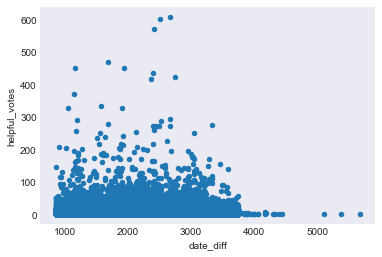

In [12]:
hdf.plot.scatter('date_diff', 'helpful_votes')

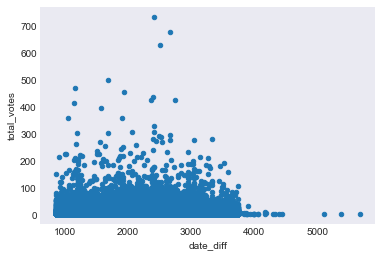

In [13]:
hdf.plot.scatter('date_diff', 'total_votes')

From the plots, and correlations, it does not look like helpfulness or total_votes depend a lot on time, specially when looked at a long time scale.

Next, I check the length of the reviews.

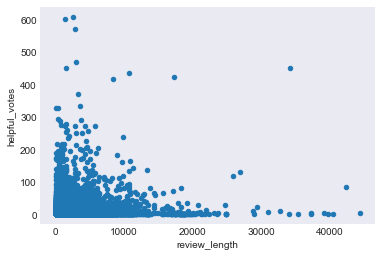

In [15]:
hdf.plot.scatter('review_length', 'helpful_votes')

(0, 10000)

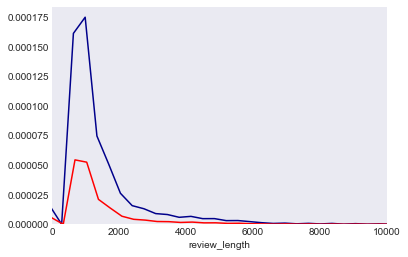

In [16]:
sns.distplot(hdf['review_length'], hist=False, kde=True, color = 'darkblue')
p1 = sns.distplot(df['review_length'], hist=False, kde=True, color = 'red')

p1.set_xlim(0, 10000)

Most reviews tend to be 1000 characters long. Very long reviews do not seem very helpful.

Lastly before starting to build any models, I look at the distribution of helpful votes, and it seems to be exponentially decaying.

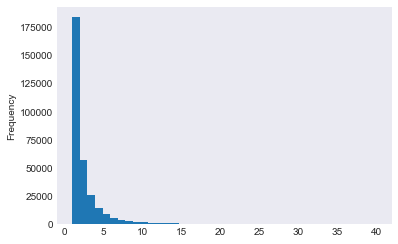

In [17]:
df["helpful_votes"].where(df["helpful_votes"] > 0).where(df["helpful_votes"] <= 40).plot.hist(bins=40)

# **ML Model for rating**

For my first model, I just append review title to the body, giving them equal weight and try. I can come back to this and play with the weightage. Title is likely to be more correlated with rating while body is more likely to be correlated with helpfulness.

Also, I sample 100k points to start my modeling. If I get any success, I can come back and try bigger number.

There are two ways to sample broadly speaking -

1. Sample randomly across the entire dataset.
2. Sample w.r.t some target variable.

The former is supported by dataframe itself, and it is a simple method call. We start with that.

In [18]:
df["text"] = df["review_headline"] + " " +	df["review_body"]
ndf = df.sample(n = 100000)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer(min_df=10, max_df=0.9)              # Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(ndf["text"].values.astype('U'))

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x, ndf["star_rating"], test_size=0.33)
reg = LinearRegression().fit(X_train, y_train)

predicted = reg.predict(X_train)
print("train score ",r2_score(y_train, predicted))
predicted = reg.predict(X_test)
r2_score(y_test, predicted)

train score  0.6294390131204746


0.3526724219967453

r-square on train itself is not great, and test seems to be doing even worse. There is quite a bit of overfitting here.

  When I look at the number of samples from each class it does not look balanced. So I try with balancing first. This may not have much to do with the overfitting problem though.

In [0]:
from imblearn.under_sampling import RandomUnderSampler 

# RandomUnderSampler tried to under sample the majority class / target variable, so that we get about equal number of observations.
rus = RandomUnderSampler()
nx, ny = rus.fit_resample(x, ndf["star_rating"])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(nx, ny, test_size=0.33)
reg = LinearRegression().fit(X_train, y_train)

predicted = reg.predict(X_train)
print("train score ",r2_score(y_train, predicted))
predicted = reg.predict(X_test)
r2_score(y_test, predicted)

train score  0.9965718395685184


-20.875558781363832

I achieved near perfect score on training set but my test set shows super overfitting. When I downsampled, I reduced the number of training examples but I did not reduce number of features. Remember with number of features going up, I need more training samples to prevent overfitting.

I will try LassoCV next. As this will try different values of alpha/lambda, and will try it for different k-folds. In total, it will run the regression multiple times. So, it may take considerable time. If I am short on time, I may want to check running Lasso directly first with some typical value of alpha - this may give me a sense if it is a direction worth exploring.

In [54]:
from sklearn.linear_model import LassoCV

reg = LassoCV().fit(X_train, y_train)

predicted = reg.predict(X_train)
print("train score ",r2_score(y_train, predicted))
predicted = reg.predict(X_test)
r2_score(y_test, predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


train score  0.6486529117299518


0.5148510605287281

There is less of overfitting now, but the result still does not look good.

I can also apply LSA and select only top N dimensions, and try regression on that. This is likely to be much faster than lasso-cv.

In [55]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=600, algorithm='arpack')
new_x = svd.fit_transform(X_train)

reg = LinearRegression().fit(new_x, y_train)

predicted = reg.predict(new_x)
print("train score ",r2_score(y_train, predicted))
predicted = reg.predict(svd.transform(X_test))
r2_score(y_test, predicted)

train score  0.6441936290400068


0.5132158644123378

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

(np.sqrt(mean_squared_error(y_test, predicted)))

0.9789660628125536

This is much faster and with comparable scores (to that of LassoCV). The RMSE is around 1. Since the ratings are also supposed to be noisy, my next hypothesis is that a difference between 4 and 5 may not be as clear, and so may be the case for rating of 2 and 1. 3 might be considered neutral, and I would put it with the group of 4 and 5.

**In other words, I am looking at a binary value of customer happiness - also known as sentiment analysis.** I may choose to drop the neutral ratings here as well to get a more clearer boundary.  

In [0]:
ndf['polarity'] = ndf['star_rating'].apply(lambda x: 0 if x < 3 else 1)
ny_train = [0 if x < 3 else 1 for x in y_train]
ny_test = [0 if x < 3 else 1 for x in y_test]

In [0]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=500)
n_X_train = selector.fit_transform(X_train, y_train)
n_X_test = selector.transform(X_test)

In [65]:
from sklearn.svm import SVC

svc = SVC(gamma='auto', kernel='linear')
svc.fit(new_x, ny_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
import sklearn.metrics

predicted = svc.predict(svd.transform(X_test))

from sklearn.metrics import classification_report
print(classification_report(ny_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       959
           1       0.83      0.90      0.86      1464

    accuracy                           0.83      2423
   macro avg       0.83      0.81      0.82      2423
weighted avg       0.83      0.83      0.83      2423



SVC seems to be doing a better job with review 'polarity'. There are a few things which I can still try to improve this further -

1. Run grid search with CV to find better values for SVC.
2. I can do an undersampling on the entire data-set, and get more datapoints.
3. I can drop the neutral ratings from this classifier to get a more noise-free signal. Also, note that after I converted the 1 to 5 rating to polarity and put rating of 3, 4 and 5 together, the dataset has again become imbalanced to the ratio of 2:3, and that could be causing lower recall for the minority class.

# **ML model on helpful votes**

I next quickly run a regressor for helpful votes, though it does not look very promising.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import TruncatedSVD

X_train, X_test, y_train, y_test = train_test_split(x, ndf["helpful_votes"], test_size=0.33)

svd = TruncatedSVD(n_components=600, algorithm='arpack')
new_x = svd.fit_transform(X_train)

reg = LinearRegression().fit(new_x, y_train)
predicted = reg.predict(new_x)
print("train score ",r2_score(y_train, predicted))


train score  0.05252742269277133


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

predicted = reg.predict(svd.transform(X_test))
print("Test r-square", r2_score(y_test, predicted))
print("Test rmse", np.sqrt(mean_squared_error(y_test, predicted)))

Test r-square 0.05607179765630099
Test rmse 2.517997215202889


As we can see it is behaving very poorly. Most likely because most of the reviews do not get any helpful votes. The RMSE may not look too bad if you consider the range of helpful votes but since most points are 0 helpful votes, RMSE is also likely to be dominated by that.
  I will try with undersampling but limit my helpful vote range to those below 10. Otherwise the sampled set will be very small.

In [7]:
# I fit a TfIdfVectorizer first and then use it to transform smaller datasets.
# TfIdf fitting would best be done on large datasets, and hence I choose to do
# the fitting first.
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=10, max_df=0.90)
vect.fit(ndf["text"].values.astype('U'))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
from imblearn.under_sampling import RandomUnderSampler 

filtered_df = ndf[ndf["helpful_votes"] <= 5]
x = vect.transform(filtered_df["text"].values.astype('U'))

rus = RandomUnderSampler()
nx, ny = rus.fit_resample(x, filtered_df["helpful_votes"])


In [38]:
X_train, X_test, y_train, y_test = train_test_split(nx, ny, test_size=0.33)

svd = TruncatedSVD(n_components=600, algorithm='arpack')
new_x = svd.fit_transform(X_train)

reg = LinearRegression().fit(new_x, y_train)
predicted = reg.predict(new_x)
print("train score ",r2_score(y_train, predicted))


train score  0.43413543525136644


In [39]:
predicted = reg.predict(svd.transform(X_test))
print("Test r-square", r2_score(y_test, predicted))
print("Test rmse", np.sqrt(mean_squared_error(y_test, predicted)))

Test r-square 0.10566170541097109
Test rmse 1.633670468224096


We still have huge overfitting because our sample size was reduced to < 4000. We can do the undersampling over the entire dataset to increase the size.

This time I use RandomUnderSampler on the entire dataframe. This means I can use different columns if required. 



In [0]:
from imblearn.under_sampling import RandomUnderSampler 

filtered_df = df[df["helpful_votes"] <= 5].dropna()

rus = RandomUnderSampler()
rus_df, ny = rus.fit_resample(filtered_df, filtered_df["helpful_votes"])


However using RandomUnderSampler on dataframe gives me raw data as array, and I need to convert it to dataframe again for convenience.

In [0]:
r_df = pd.DataFrame(rus_df, columns=df.columns)
x = vect.transform(r_df["text"].values.astype('U'))

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

X_train, X_test, y_train, y_test = train_test_split(x, r_df["helpful_votes"], test_size=0.33)

svd = TruncatedSVD(n_components=600, algorithm='arpack')
new_x = svd.fit_transform(X_train)



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np


reg = LinearRegression().fit(new_x, y_train)
predicted = reg.predict(new_x)
print("train score ",r2_score(y_train, predicted))

predicted = reg.predict(svd.transform(X_test))
print("Test r-square", r2_score(y_test, predicted))
print("Test rmse", np.sqrt(mean_squared_error(y_test, predicted)))


train score  0.22287443933689477
Test r-square 0.20017282312276052
Test rmse 1.520543403771622


My regression does not return very great result. I try once with feature-selection. Note that LSA reduces dimensions but that reduction is independent of the target variable. 

Using SelectKBest, I can target feature selection based on target variable.

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=500)
n_X_train = selector.fit_transform(X_train, y_train.astype(float))
n_X_test = selector.transform(X_test)

reg = LinearRegression().fit(n_X_train, y_train)
predicted = reg.predict(n_X_train)
print("train score ",r2_score(y_train, predicted))

predicted = reg.predict(n_X_test)
print("Test r-square", r2_score(y_test, predicted))
print("Test rmse", np.sqrt(mean_squared_error(y_test, predicted)))


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


train score  0.22040905226612106
Test r-square 0.18690860968846856
Test rmse 1.5330997909185073


This still does not give any better result. It is slightly worse, but that could be fixed by tweaking number of features.

Next, I try regressing on 'helpfulness' i.e. ratio of helpful_votes/total.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

X_train, X_test, y_train, y_test = train_test_split(x, r_df["helpfulness"], test_size=0.33)

svd = TruncatedSVD(n_components=600, algorithm='arpack')
new_x = svd.fit_transform(X_train)


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np


reg = LinearRegression().fit(new_x, y_train)
predicted = reg.predict(new_x)
print("train score ",r2_score(y_train, predicted))

predicted = reg.predict(svd.transform(X_test))
print("Test r-square", r2_score(y_test, predicted))
print("Test rmse", np.sqrt(mean_squared_error(y_test, predicted)))


train score  0.2212559441134303
Test r-square 0.19891775467084183
Test rmse 0.24833551357983982


It seems like there is very little hope with regression. So, finally I try to build a classifier instead. I drop reviews with number of helpful votes 1 and 2. This is to reduce noise and define a clear boundary between what is helpful and what is not.

Any review with 0 votes is not helpful, and anything with > 2 is helpful under this definition.

In [42]:
cl_df = r_df[r_df["helpful_votes"] != 1][r_df["helpful_votes"] != 2]
cl_df["helpful"] = cl_df["helpful_votes"] != 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


I rebalance the classes, and train an SVM classifier with linear kernel (least likely to overfit).

In [45]:
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.svm import SVC

x = vect.transform(cl_df["text"].values.astype('U'))

rus = RandomUnderSampler()
nx, ny = rus.fit_resample(x, cl_df["helpful"])

X_train, X_test, y_train, y_test = train_test_split(nx, ny, test_size=0.33)

svc = SVC(gamma='auto', kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
import sklearn.metrics
from sklearn.metrics import classification_report

predicted = svc.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.76      0.73      0.75      2947
        True       0.74      0.77      0.76      2937

    accuracy                           0.75      5884
   macro avg       0.75      0.75      0.75      5884
weighted avg       0.75      0.75      0.75      5884



This seems much better that whatever we have tried so far. I next try to apply LSA before SVM to reduce noise (below), but it seems like LSA with linear kerner does not have much effect.

In [47]:
svd = TruncatedSVD(n_components=600, algorithm='arpack')
new_x = svd.fit_transform(X_train)

svc = SVC(gamma='auto', kernel='linear')
svc.fit(new_x, y_train)

predicted = svc.predict(svd.transform(X_test))
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.78      0.73      0.75      2947
        True       0.74      0.79      0.77      2937

    accuracy                           0.76      5884
   macro avg       0.76      0.76      0.76      5884
weighted avg       0.76      0.76      0.76      5884



# **Conclusions:**

Helpful votes seem to be very noisy, if looked at by the exact counts of votes. A binary classifier performs much better on helpfulness than a regressor, even after balancing the datasets.

SVC over TfIdf performs decently but many things still remain to be tried -
    1. bi-grams
    2. adjective/adverb annotation
    3. SVM parameter tuning. It is possible that b may not be required if SVM parameters are tuned.
    
Given that the EDA shows that there is little universal agreement on what is considered helpful, it is possible that we do not get a very good predictor for it i.e it is possible that different sets of people consider different attributes more helpful, or that there is good amount of spam in our data.